In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../datasets/pima_diabetes.csv')

In [5]:
df.isnull().sum()
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

(array([ 11.,   0.,  15., 156., 268., 224.,  78.,  12.,   3.,   1.]),
 array([ 0.  ,  6.71, 13.42, 20.13, 26.84, 33.55, 40.26, 46.97, 53.68,
        60.39, 67.1 ]),
 <BarContainer object of 10 artists>)

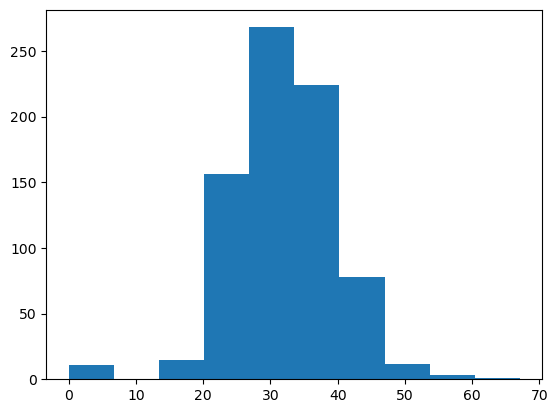

In [8]:
plt.hist(df['BMI'], bins=10)

In [22]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness', 
        'Insulin', 'BMI']]
y = df['Outcome']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42)

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [26]:
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

In [31]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=3,
                            random_state=42)
dt.fit(X_train, y_train)

dt_pred_proba = dt.predict_proba(X_test)

fpr , tpr , threshosd = roc_curve(y_test ,dt_pred_proba[: , 1] )

In [37]:
dt2 = DecisionTreeClassifier(max_depth=7, min_samples_split=3,
                            random_state=42)
dt2.fit(X_train, y_train)

dt2_pred_proba = dt2.predict_proba(X_test)

fpr2 , tpr2 , threshosd2 = roc_curve(y_test ,dt2_pred_proba[: , 1] )

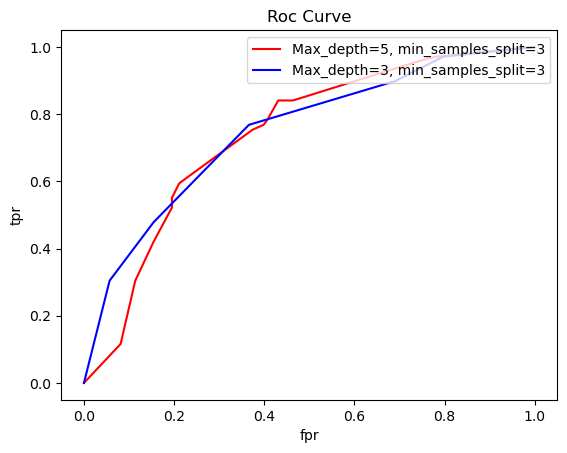

In [36]:
plt.title("Roc Curve")

plt.xlabel("fpr")
plt.ylabel("tpr")

plt.plot(fpr, tpr, "r", label = 'Max_depth=5, min_samples_split=3')
plt.plot(fpr2, tpr2, "b", label = 'Max_depth=3, min_samples_split=3')
plt.legend(loc = "upper right")

plt.show()

In [38]:
from sklearn.tree import export_text

r = export_text(dt2, feature_names=['Glucose' , 'BloodPressure' , 'SkinThickness' , 'Insulin' , 'BMI'])
print(r)

|--- Glucose <= 0.71
|   |--- BMI <= -0.41
|   |   |--- Glucose <= -0.50
|   |   |   |--- class: 0
|   |   |--- Glucose >  -0.50
|   |   |   |--- BMI <= -0.74
|   |   |   |   |--- Glucose <= 0.12
|   |   |   |   |   |--- Glucose <= -0.41
|   |   |   |   |   |   |--- BloodPressure <= -0.25
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- BloodPressure >  -0.25
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Glucose >  -0.41
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Glucose >  0.12
|   |   |   |   |   |--- BloodPressure <= -0.65
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- BloodPressure >  -0.65
|   |   |   |   |   |   |--- BMI <= -2.81
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- BMI >  -2.81
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |--- BMI >  -0.74
|   |   |   |   |--- Glucose <= -0.44
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Glucose >  -0.44
|   |   |   |  

In [39]:
dt2.feature_importances_

array([0.55933263, 0.13687764, 0.01966154, 0.0753497 , 0.20877849])